# Final Project
## EDA and Results


## Import Packages

In [1]:

import pandas as pd
import numpy as np
import math 
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.metrics import auc
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

## Read and check the data 

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 200

In [3]:
#read in csv by pandas
df = pd.read_csv('county_census_and_election_result.csv')

In [4]:
# drop na values
df=df.dropna()

In [5]:
df.columns

Index(['year', 'county_fips', 'inctot', 'mortamt1', 'avrg_age', 'ftotinc',
       'foodstmp_1_freq', 'foodstmp_2_freq', 'sex_2_freq', 'sex_1_freq',
       'marst_5_freq', 'marst_6_freq', 'marst_1_freq', 'marst_4_freq',
       'marst_3_freq', 'marst_2_freq', 'race_1_freq', 'race_2_freq',
       'race_7_freq', 'race_8_freq', 'race_5_freq', 'race_6_freq',
       'race_3_freq', 'race_4_freq', 'race_9_freq', 'ctz_stat_1_freq',
       'ctz_stat_3_freq', 'ctz_stat_2_freq', 'lang_1_freq', 'lang_2_freq',
       'educ_attain_2.0_freq', 'educ_attain_1.0_freq', 'educ_attain_3.0_freq',
       'educ_attain_4.0_freq', 'empstat_1.0_freq', 'empstat_3.0_freq',
       'empstat_2.0_freq', 'state_po', 'county_name', 'democrat', 'green',
       'liberitarian', 'other', 'republican', 'winner'],
      dtype='object')

* We can see that the most original column names are meaningless, so I will change them to meaningful column names that can be much easier to identity each column means.

In [6]:
df.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
1529,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
1530,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
1531,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
1532,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
1533,2008,1081,24870.4,725.1,40.6,45575.0,92.4,7.6,52.1,47.9,...,36.3,3.8,AL,LEE,21498.0,0.0,0.0,597.0,32230.0,1.0


* winner is our target, and 1 menas republican wins, and 0 means democrats win.

In [7]:
# change the original name to the name that is much clear for viewing and editing
X_alt_names = ["year", "cnty_fip", "avg_annual_income", "avg_mortgage_payments", "avg_age", "avg_annual_family_income", "perc_no_foodstamps", "perc_foodstamps", "perc_female", "perc_male", "perc_widowed", "perc_never_married", "perc_married_spouse_present", "perc_divorced", "perc_separated", "perc_married_spouse_absent", "perc_white", "perc_black", "perc_other_race", "perc_two_races", "perc_japanese", "perc_other_asian", "perc_native_american", "perc_chinese", "perc_three_races", "perc_us_citizen", "perc_non_us_citizen", "perc_naturalized_citizen", "perc_english_home", "perc_other_lang_home", "perc_college_or_bachelor_degree", "perc_high_school_or_lower_education", "perc_masters_or_pro_certificate", "perc_doctoral_degree", "perc_employed", "perc_not_in_labor_force", "perc_unemployed", "st_abbr", "cnty_name", "num_votes_dem", "num_votes_green", "num_votes_libertarian", "num_votes_other", "num_votes_rep", "winner"]
df.columns = X_alt_names

In [8]:
df.columns

Index(['year', 'cnty_fip', 'avg_annual_income', 'avg_mortgage_payments',
       'avg_age', 'avg_annual_family_income', 'perc_no_foodstamps',
       'perc_foodstamps', 'perc_female', 'perc_male', 'perc_widowed',
       'perc_never_married', 'perc_married_spouse_present', 'perc_divorced',
       'perc_separated', 'perc_married_spouse_absent', 'perc_white',
       'perc_black', 'perc_other_race', 'perc_two_races', 'perc_japanese',
       'perc_other_asian', 'perc_native_american', 'perc_chinese',
       'perc_three_races', 'perc_us_citizen', 'perc_non_us_citizen',
       'perc_naturalized_citizen', 'perc_english_home', 'perc_other_lang_home',
       'perc_college_or_bachelor_degree',
       'perc_high_school_or_lower_education',
       'perc_masters_or_pro_certificate', 'perc_doctoral_degree',
       'perc_employed', 'perc_not_in_labor_force', 'perc_unemployed',
       'st_abbr', 'cnty_name', 'num_votes_dem', 'num_votes_green',
       'num_votes_libertarian', 'num_votes_other', 'num_votes

* Now it should be much more easier to know what each column means

In [9]:
df.head()

,year,cnty_fip,avg_annual_income,avg_mortgage_payments,avg_age,avg_annual_family_income,perc_no_foodstamps,perc_foodstamps,perc_female,perc_male,...,perc_not_in_labor_force,perc_unemployed,st_abbr,cnty_name,num_votes_dem,num_votes_green,num_votes_libertarian,num_votes_other,num_votes_rep,winner
1529,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
1530,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
1531,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
1532,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
1533,2008,1081,24870.4,725.1,40.6,45575.0,92.4,7.6,52.1,47.9,...,36.3,3.8,AL,LEE,21498.0,0.0,0.0,597.0,32230.0,1.0


##### And I also add the dictionary of actual names of the columns here for the purpose of plots later

In [10]:
#Set the dictionary for actual name with the names we use to make the graphs show the actual names
actual_names = ["Year", "County FIP Code", "Average Annual Income of Individuals", "Average Amount of Mortgage Payments", "Average Age", "Average Annual Total Family Income", "Percentage of Individuals Who Did Not Receive Foodstamps", "Percentage of Individuals Who Received Foodstamps", "Percentage of Females", "Percentage of Males", "Percentage of Widowed", "Percentage of Never Married", "Percentage of Married Spouse Present", "Percentage of Divorced", "Percentage of Seperated", "Percentage of Married Spouse Absent", "Percentage of White", "Percentage of Black/African American", "Percentage of Other Race", "Percentage of Two major Races", "Percentage of Japanese", "Percentage or Other Asian", "Percentage of American Indian or Alaska Native", "Percentage of Chinese", "Percentage of Three or More Races", "Percentage of US Citizen", "Percentage of Non US Citizen", "Percentage of Naturalized Citizen", "Percentage of English Is Spoken At Home", "Percentage of Another Language Is Spoken At Home", "Percentage of Some College or Bachelor Degree", "Percentage of High School or Lower Education", "Percentage of Masters or Professional Certificate", "Percentage of Doctoral Degree", "Percentage of Employed", "Percentage of Not In The Labor Force", "Percentage of Unemployed", "State Abbreviations", "County Name", "Number of Votes For Democrats Party", "Number of Votes For Green Party", "Number of Votes For Liberitarian Party", "Number of Votes For Other Parties", "Number of Votes For Republican Party", "0 For Democrats and 1 For Republican"]

column_mapping = {df.columns[i]: actual_names[i] for i in range(len(actual_names))}

In [11]:
#drop columns that are not needed
# the democrat and republican votes also should be droped because they are highly correlated to the final results
# other votes we don't need to drop since they don't have low correlation with 
x=df.drop(columns=['winner',"st_abbr",'cnty_name','year','num_votes_dem','num_votes_rep','cnty_fip'])
y=df['winner']
#find data frame correlation


In [12]:
# Create a filtered list of the column names from the `data` list
filtered_actual_names = [column_mapping[col] for col in x.columns]

### Correlation Heatmap

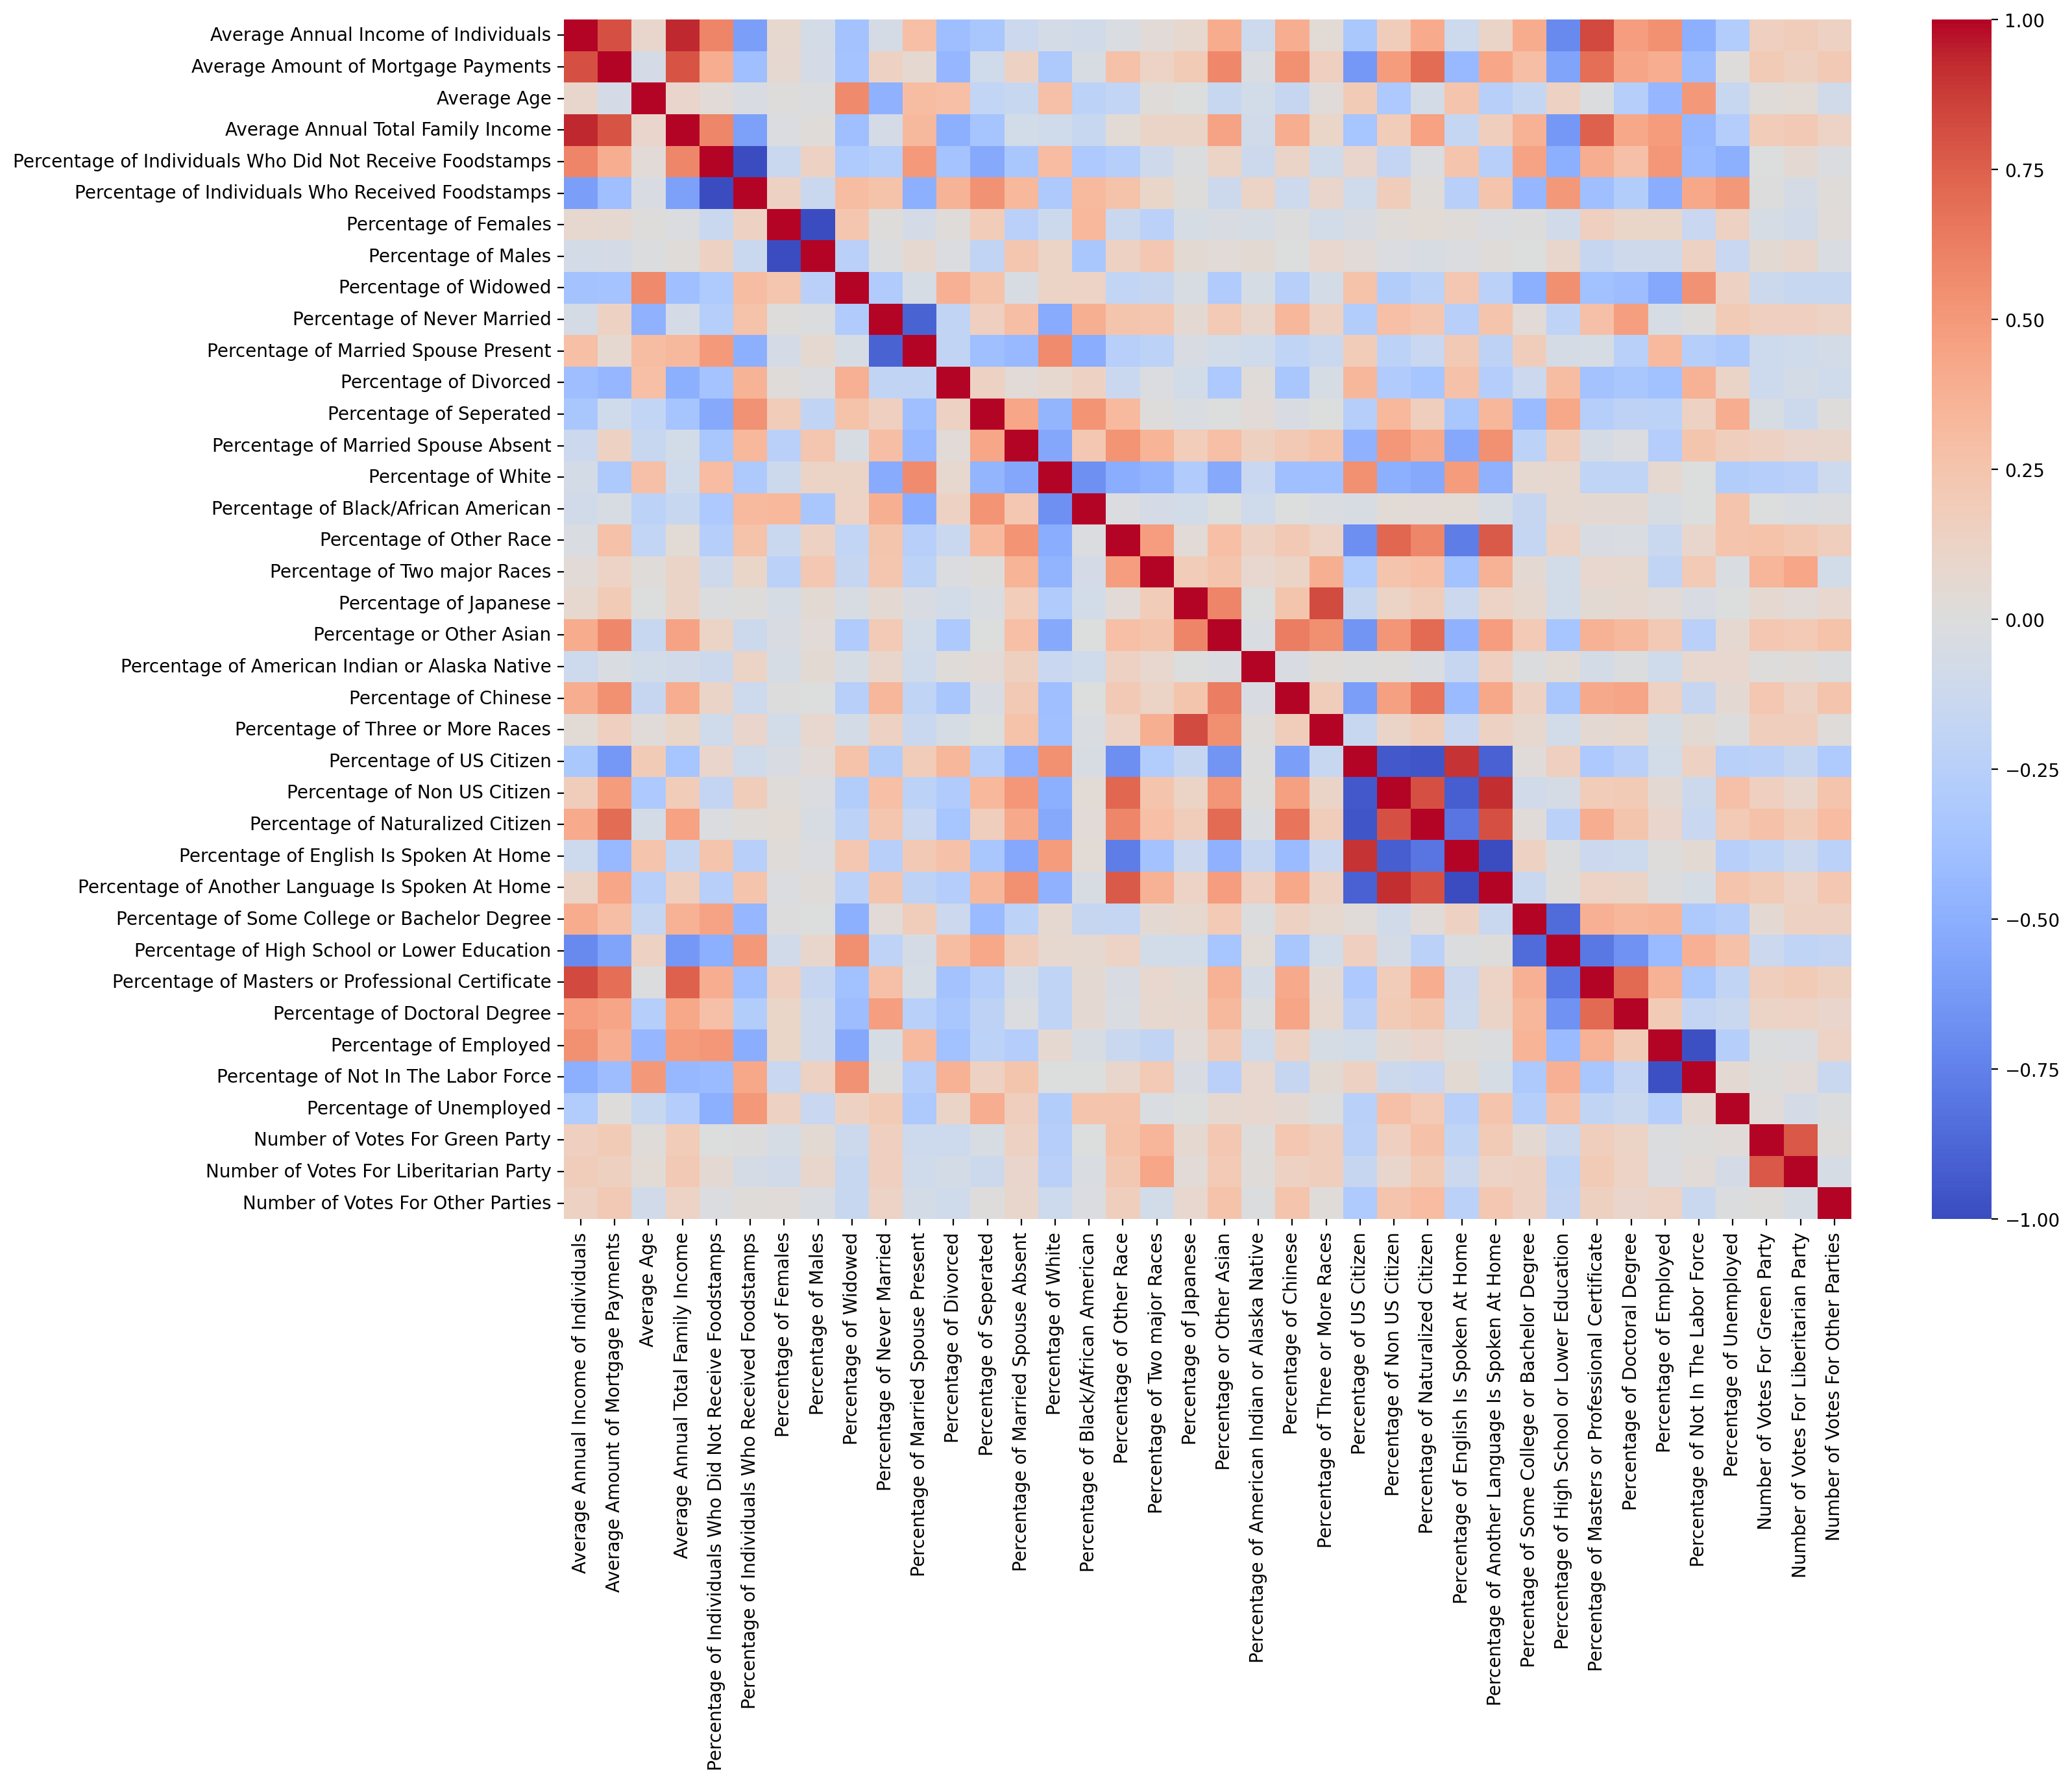

In [14]:
# Calculate the correlation matrix
corr = x.corr()

# Plot the heatmap with column names
plt.figure(figsize=(16, 12))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot_kws={"size": 8},xticklabels=filtered_actual_names,yticklabels=filtered_actual_names)

# Rotate the x-axis labels for better readability
# Please note that the actual column name is long, so it is better to rotate 90 degree
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#save to png
#plt.savefig("../image/correlation.png", dpi=300,bbox_inches='tight')

# Show the plot
plt.show()


In [15]:
# Create a correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated columns
X = x.drop(to_drop, axis=1)

In [16]:
X.head()

,avg_annual_income,avg_mortgage_payments,avg_age,perc_no_foodstamps,perc_female,perc_widowed,perc_never_married,perc_married_spouse_present,perc_divorced,perc_separated,...,perc_us_citizen,perc_college_or_bachelor_degree,perc_high_school_or_lower_education,perc_masters_or_pro_certificate,perc_doctoral_degree,perc_employed,perc_unemployed,num_votes_green,num_votes_libertarian,num_votes_other
1529,27222.4,902.2,48.6,94.2,52.5,8.3,12.1,63.4,13.2,1.3,...,97.1,51.8,39.3,8.4,0.5,54.1,2.4,0.0,0.0,756.0
1530,20951.6,551.7,47.1,89.1,54.8,8.7,19.5,54.5,11.5,3.0,...,97.3,41.1,52.6,5.0,1.2,54.3,4.5,0.0,0.0,560.0
1531,24017.6,658.6,48.2,94.2,54.6,10.5,13.8,60.9,11.7,1.5,...,98.6,45.3,46.6,7.9,0.2,50.3,2.9,0.0,0.0,645.0
1532,28109.5,812.4,47.2,93.5,55.0,9.5,23.5,50.3,12.3,2.5,...,97.5,47.8,42.0,9.3,0.9,58.5,3.4,0.0,0.0,2482.0
1533,24870.4,725.1,40.6,92.4,52.1,4.9,32.1,51.2,8.3,1.7,...,94.4,53.3,32.2,10.8,3.7,59.8,3.8,0.0,0.0,597.0


In [17]:
# Check the coloumn names which we changed for betting viewing
X.columns

Index(['avg_annual_income', 'avg_mortgage_payments', 'avg_age',
       'perc_no_foodstamps', 'perc_female', 'perc_widowed',
       'perc_never_married', 'perc_married_spouse_present', 'perc_divorced',
       'perc_separated', 'perc_married_spouse_absent', 'perc_white',
       'perc_black', 'perc_other_race', 'perc_two_races', 'perc_japanese',
       'perc_other_asian', 'perc_native_american', 'perc_chinese',
       'perc_three_races', 'perc_us_citizen',
       'perc_college_or_bachelor_degree',
       'perc_high_school_or_lower_education',
       'perc_masters_or_pro_certificate', 'perc_doctoral_degree',
       'perc_employed', 'perc_unemployed', 'num_votes_green',
       'num_votes_libertarian', 'num_votes_other'],
      dtype='object')

## Set up Model

In [18]:
# split the data first
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=19)

### Random Forest

In [19]:
#random forest
clf=RandomForestClassifier(n_estimators=480,max_depth=18,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, n_estimators=480, random_state=42)

### Random Forest --- Decision Tree

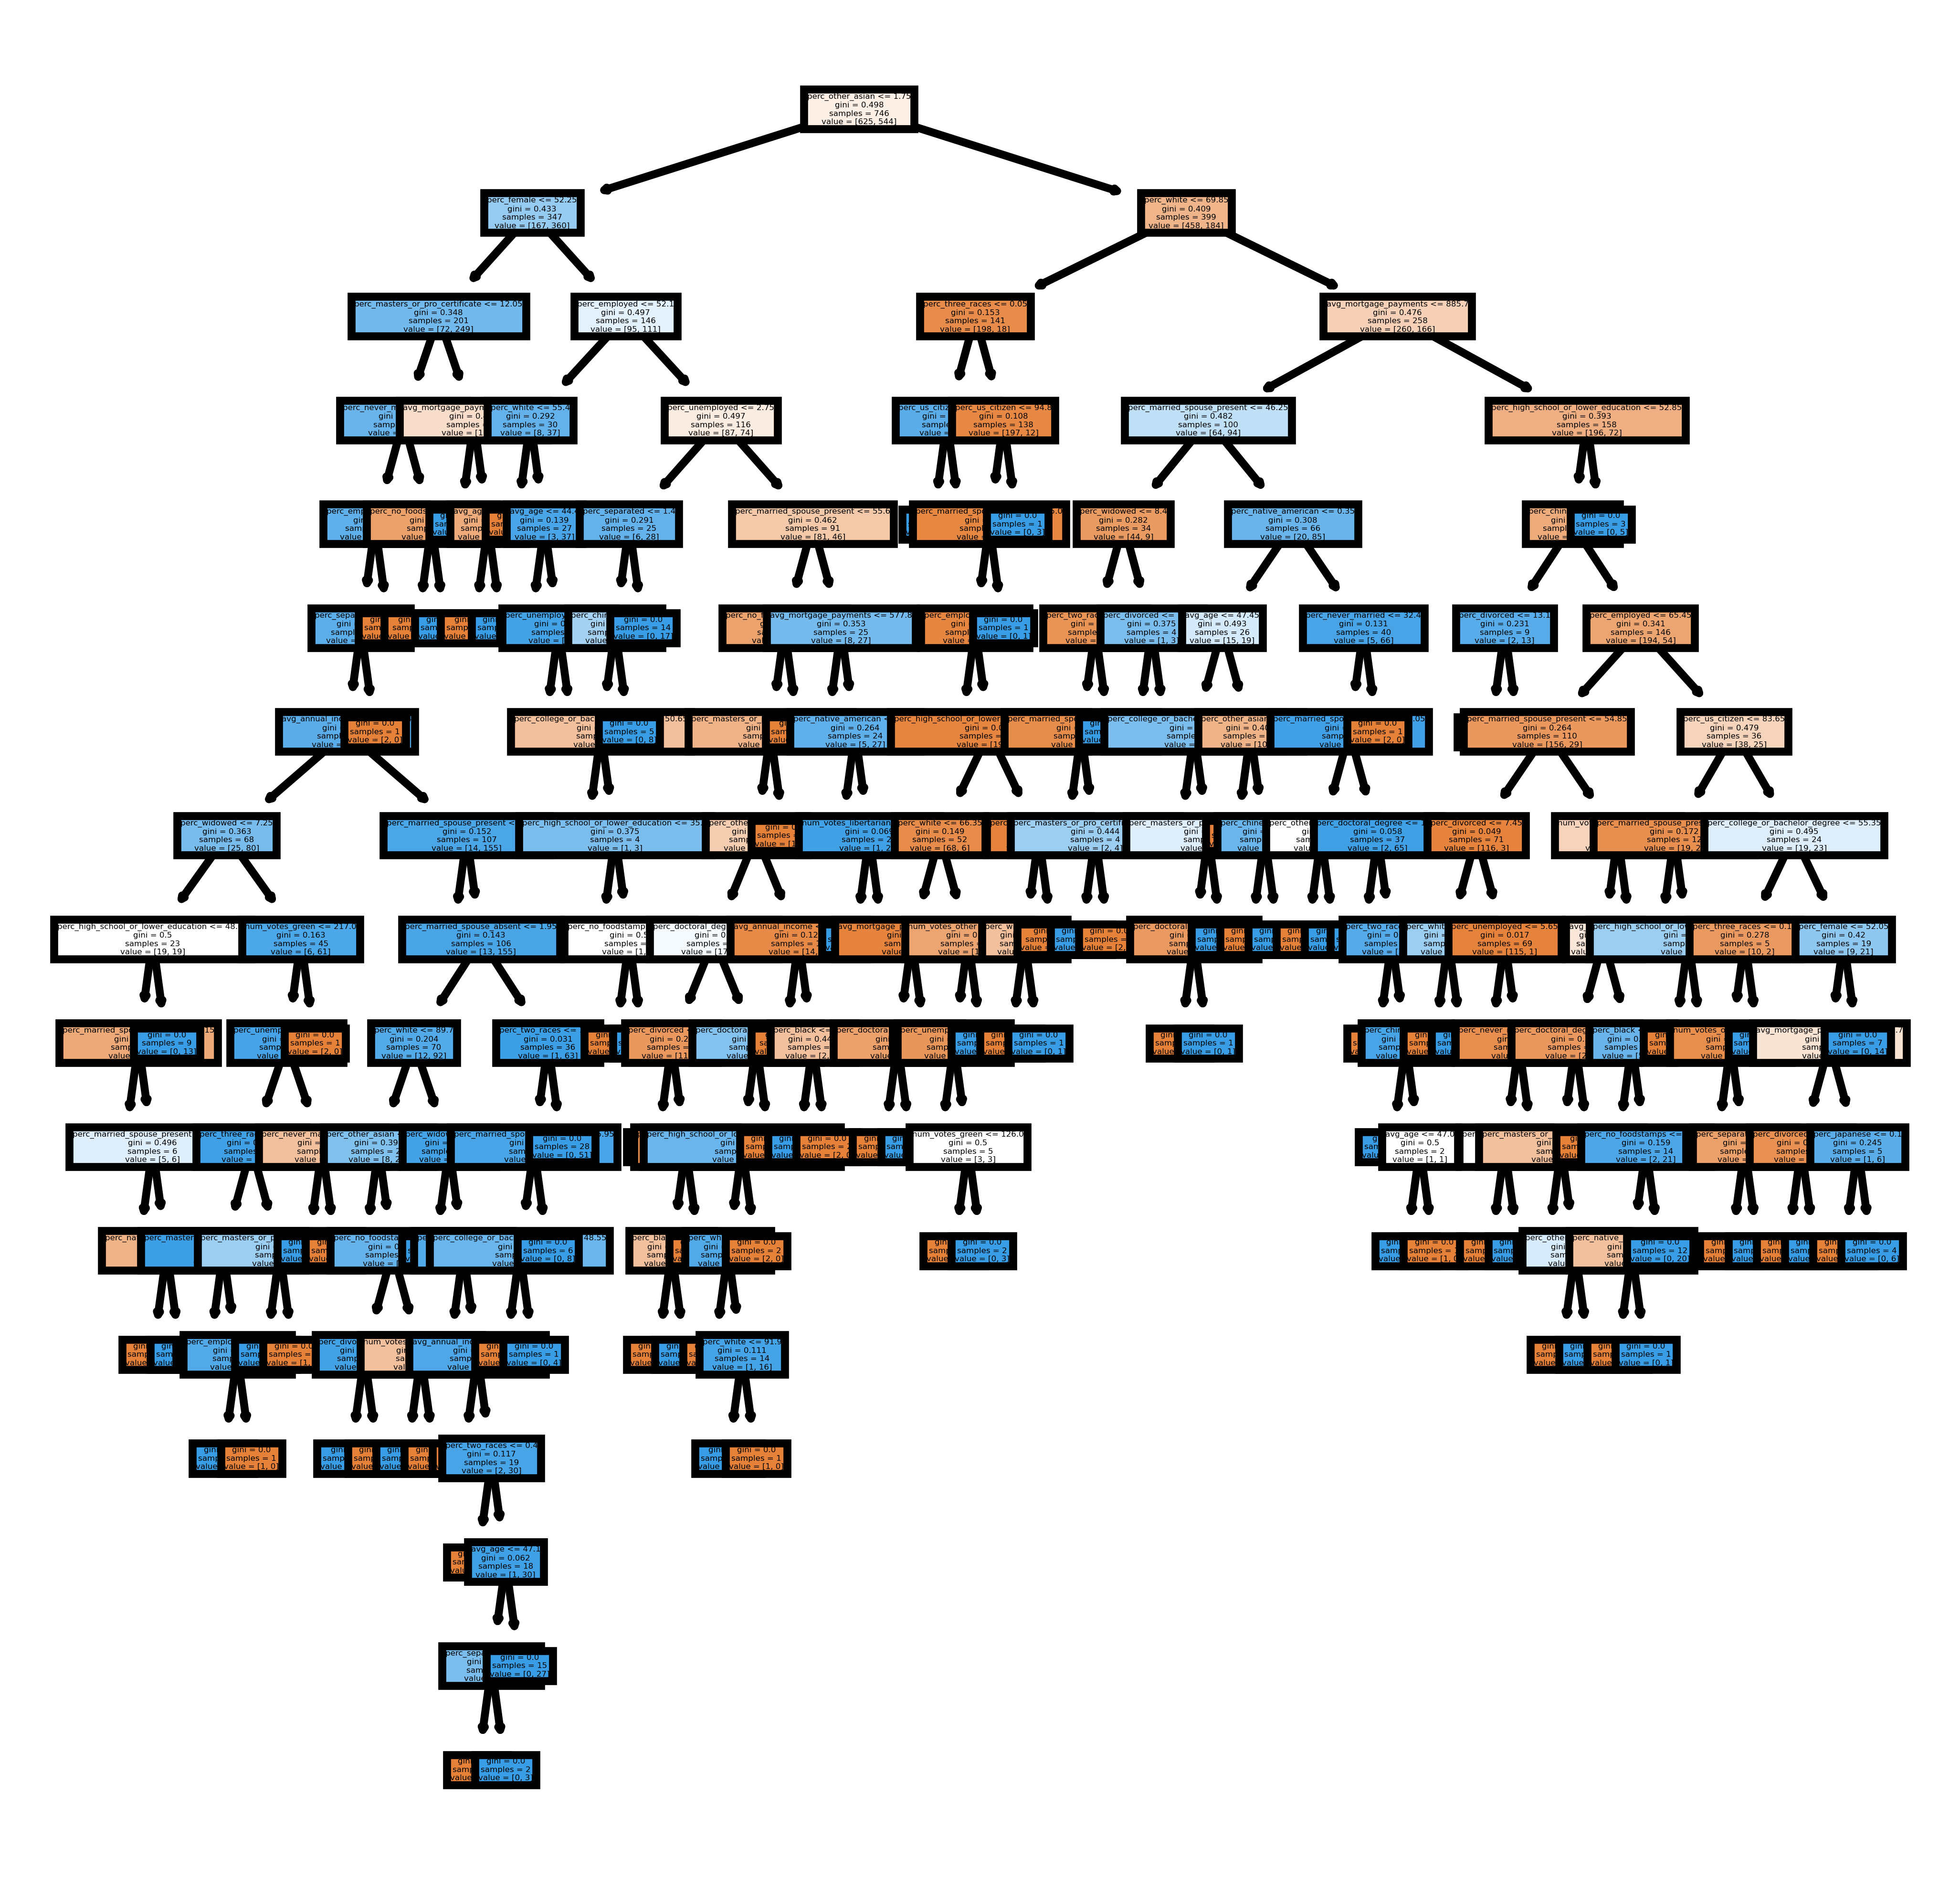

In [21]:
# set random seed
fn=x_train.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1200)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               filled = True);
#fig.savefig('../image/rf_individualtree.png')

#### Importance Plot of Random Forest

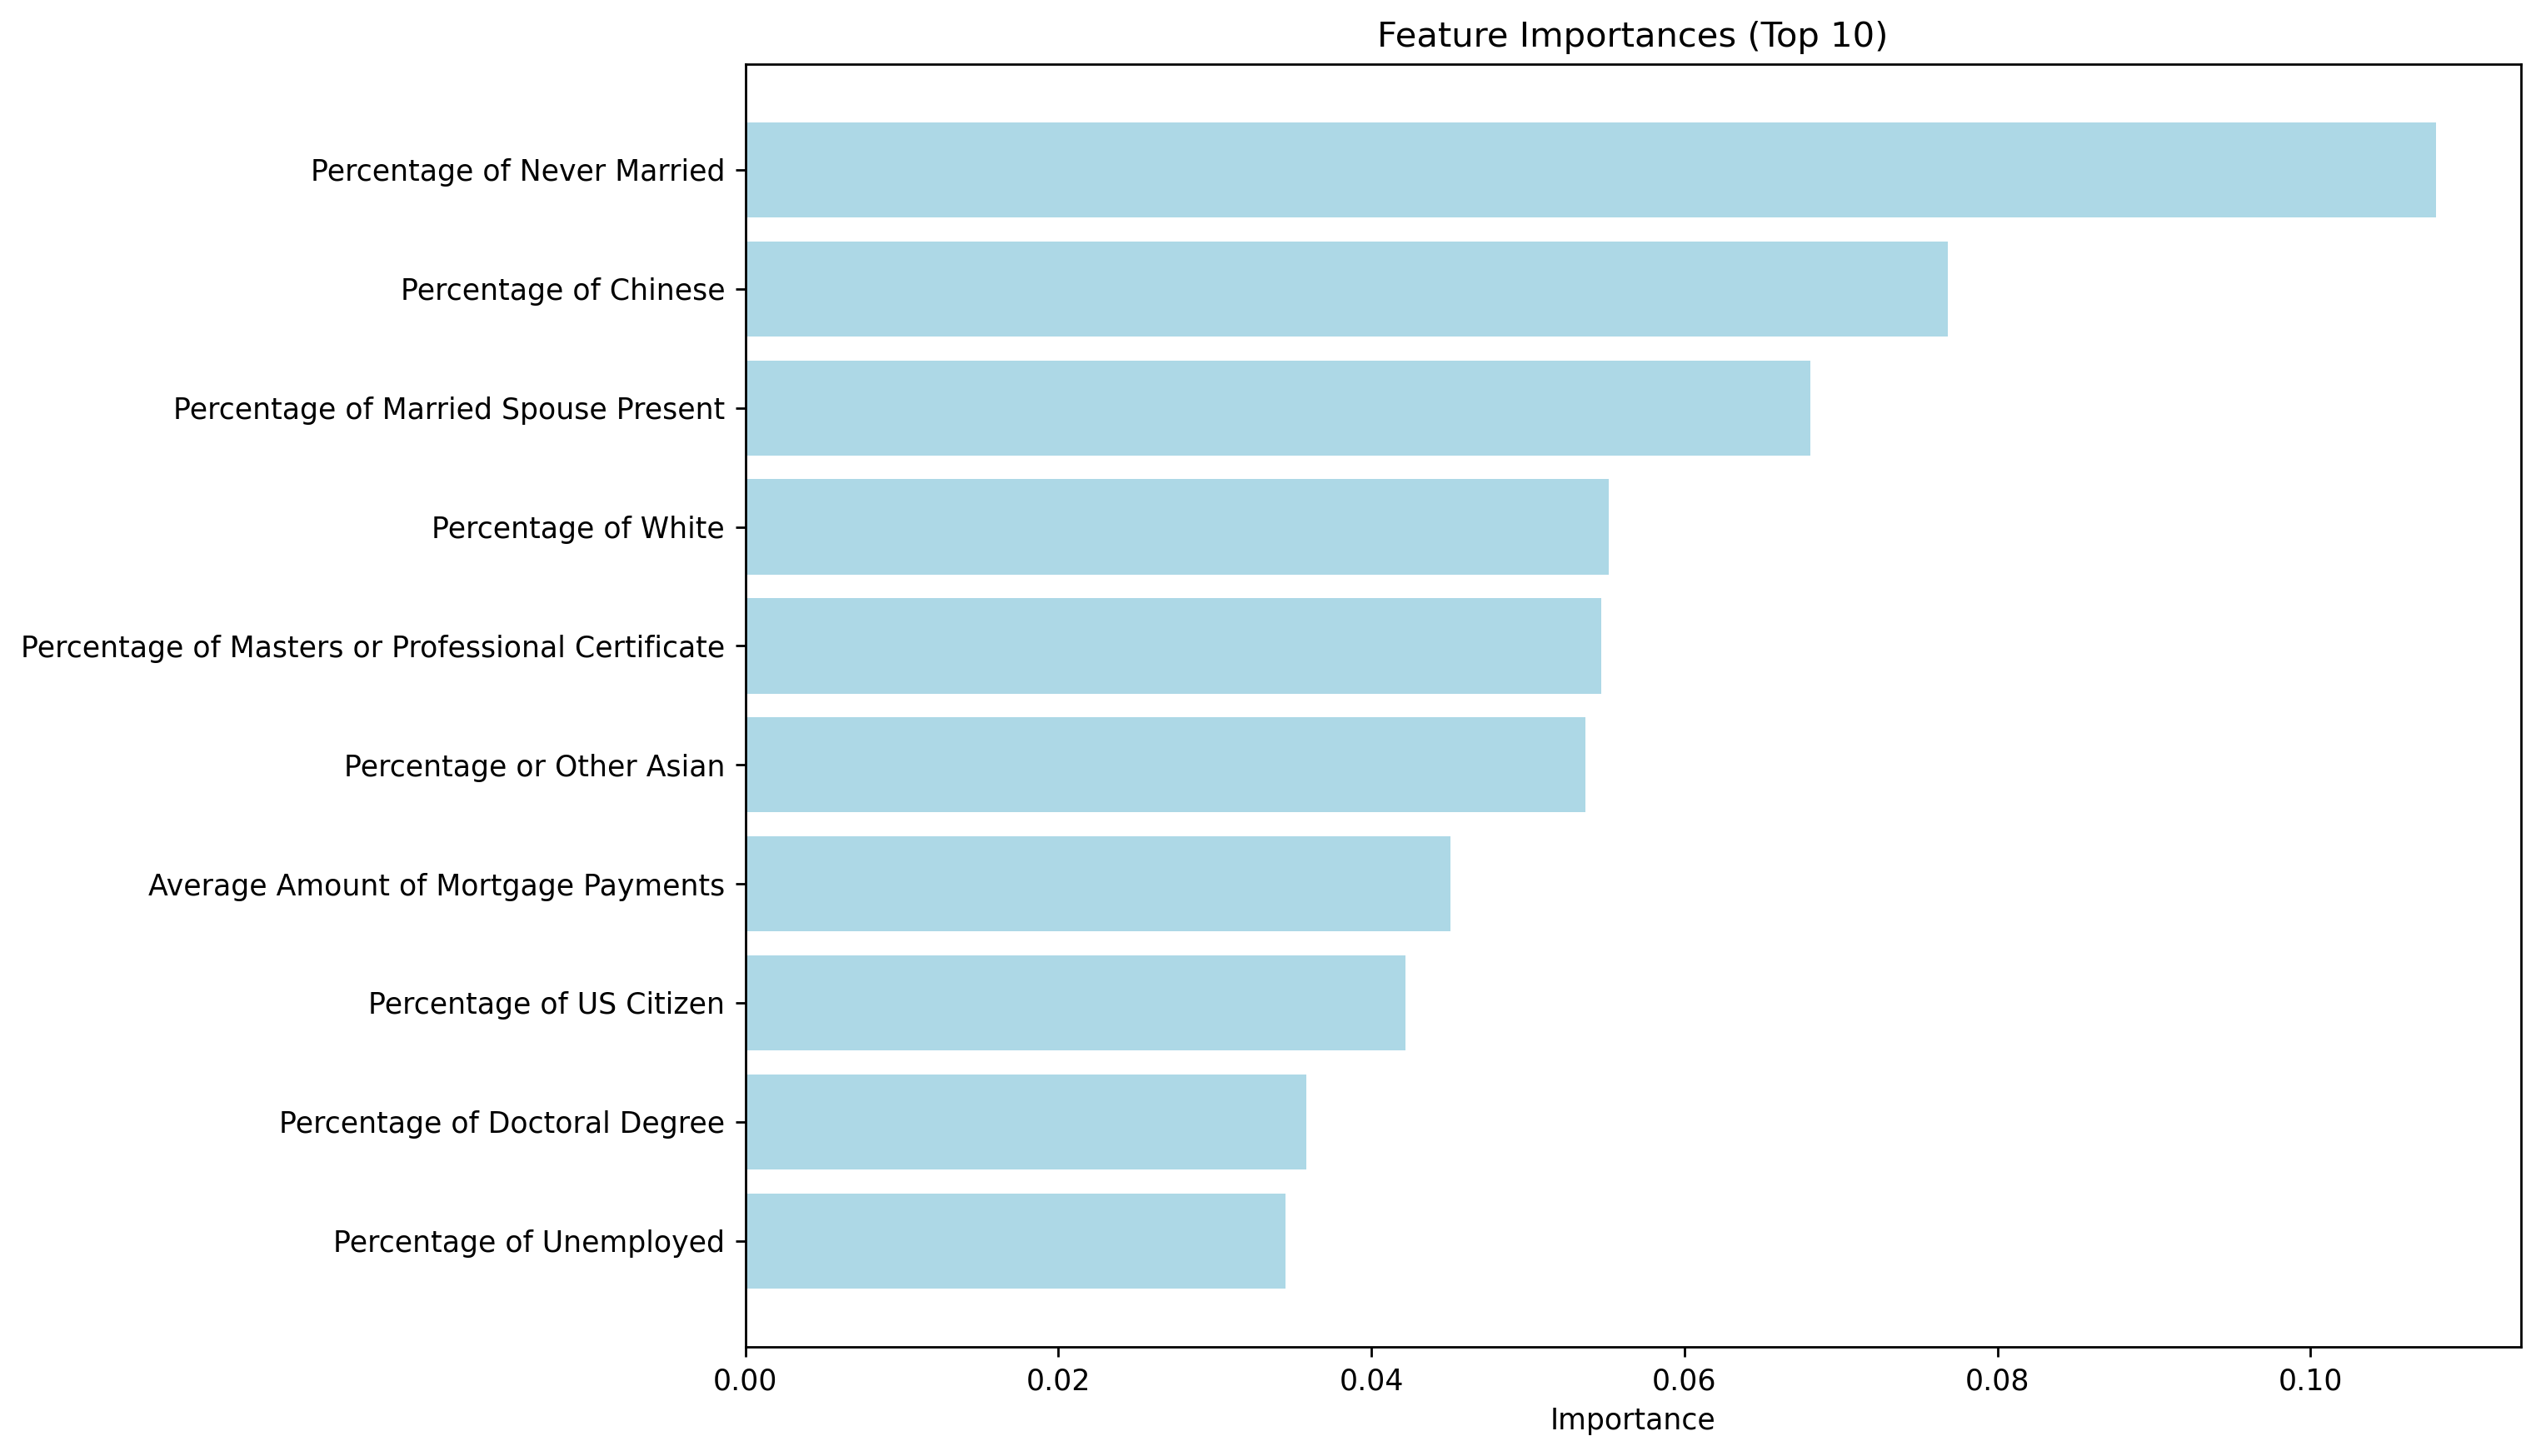

In [22]:
# Get feature importances and sort by descending importance
importances = clf.feature_importances_
sorted_idx = importances.argsort()[::-1]

# Replace the graph names with actual names
filtered_actual_names = [column_mapping[col] for col in x_train.columns[sorted_idx][:10]]
# Plot the feature importances of the forest
plt.figure(dpi=250,figsize=(11,8))
plt.title("Feature Importances (Top 10)")
plt.barh(range(10), importances[sorted_idx][:10], align='center', color='lightblue')
plt.yticks(range(10), filtered_actual_names)
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.xlabel('Importance')

#save the fig
#plt.savefig("../image/Importance_plot.png", dpi=300,bbox_inches='tight')

plt.show()

In [23]:
importances[sorted_idx][:10]

array([0.10803271, 0.07683695, 0.06804406, 0.05514292, 0.0546754 ,
       0.05368793, 0.04504484, 0.04218387, 0.03585878, 0.03453942])

#### Confusion Matrix of Random Forest

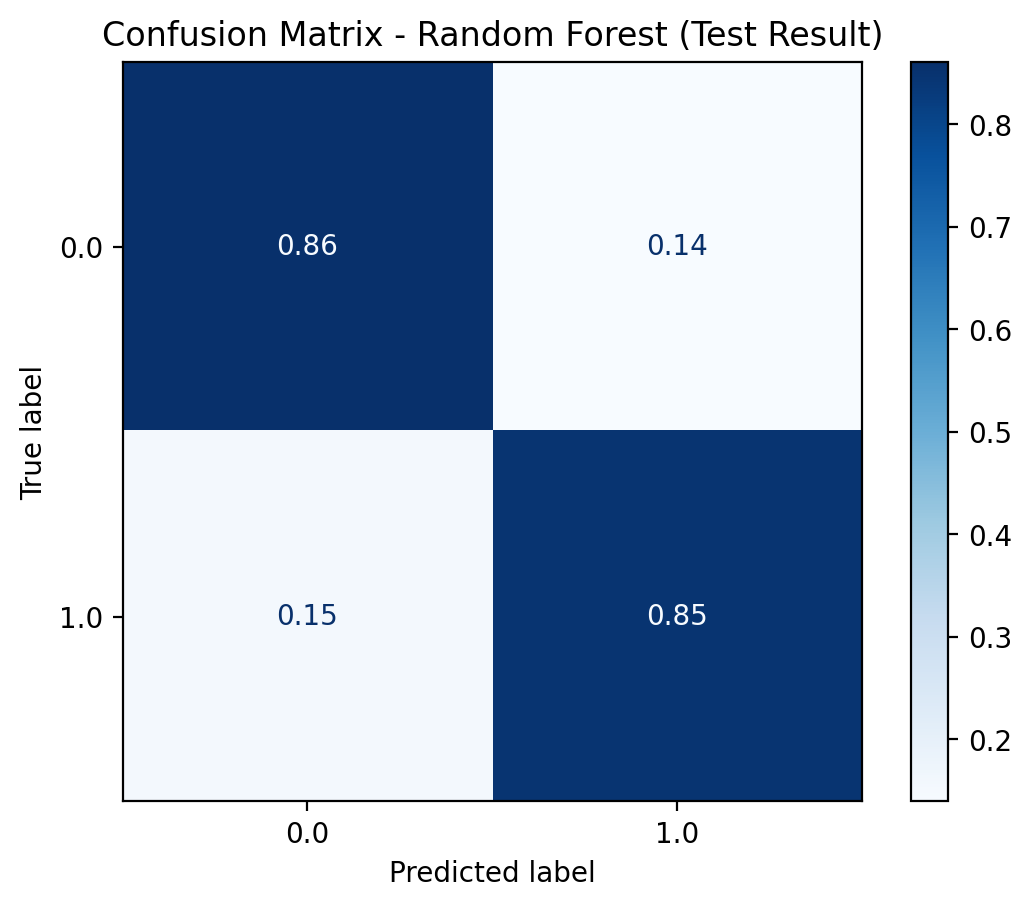

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix for random forest model
def plot_cm(model, x_test, y_test, label, dpi=100):
    disp = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title(f'Confusion Matrix - {label} (Test Result)')
    #plt.savefig(f'../image/confusion_matrix_{label}.png', dpi=dpi)
    plt.show()

plot_cm(clf, x_test, y_test, 'Random Forest', dpi=300)

### Logistic Regression

In [25]:
#logistic regression
model = Pipeline([('scaler', StandardScaler()),('features',PolynomialFeatures(degree=2)),('GLM',LogisticRegression())]) 
model.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures()),
                ('GLM', LogisticRegression())])

### KNN Clustering (Unsupervised)

In [26]:
# create a array of y datset (target) and reshape it
threeloss=np.array(y.copy()).reshape(-1, 1)
#normalize the data
normalizer = preprocessing.Normalizer()
df2 = pd.DataFrame(normalizer.fit_transform(threeloss)) 

# Set the RFM data eaqual to X dataset (predictors)
RFM_data=X

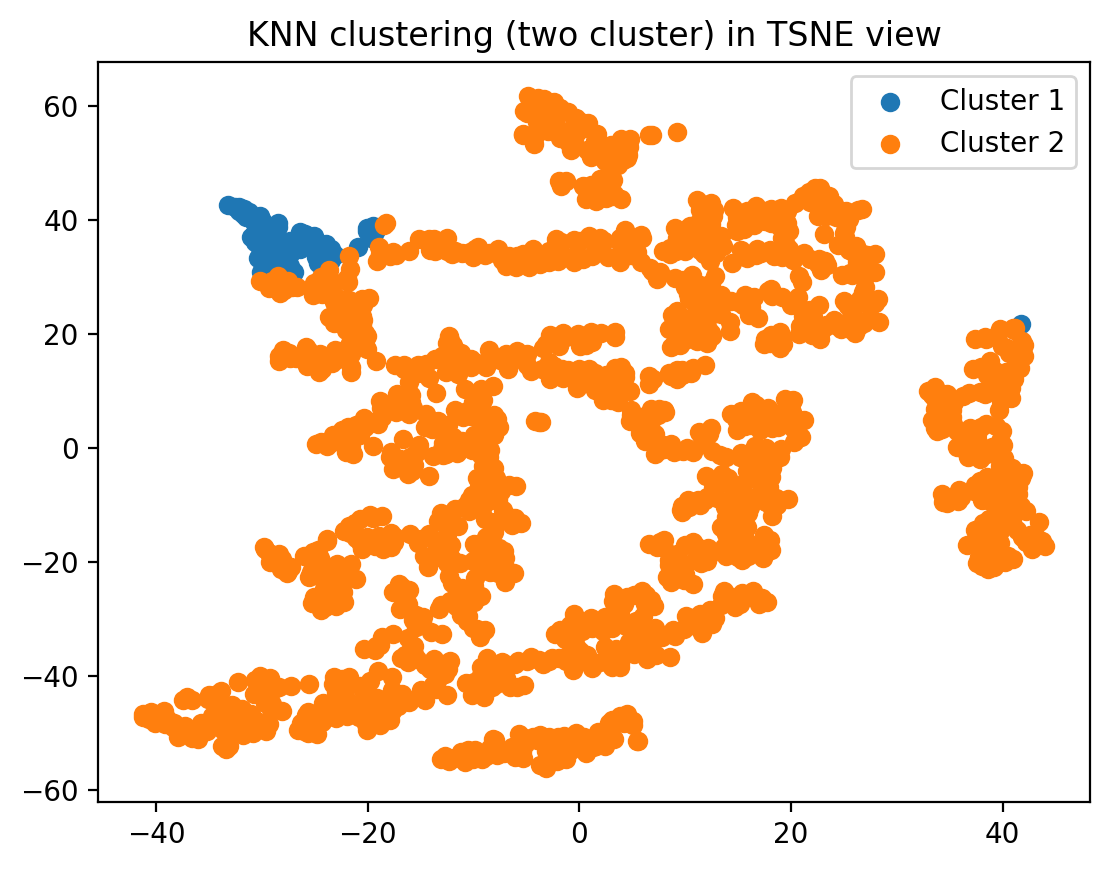

In [28]:
# In TSNE View
PCA_transformer = TSNE(2)
PCA_data = PCA_transformer.fit_transform(RFM_data)

# For two clusters.
n_clusters = 2
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(RFM_data)

# Plot!
for i in range(n_clusters):
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.legend()
plt.title("KNN clustering (two cluster) in TSNE view")



# Save the plot
#plt.savefig("../image/clusters_plot.png", dpi=300,bbox_inches='tight')

# Display the plot 
plt.show()


* Please note that the plot will be changed each time you rerun it

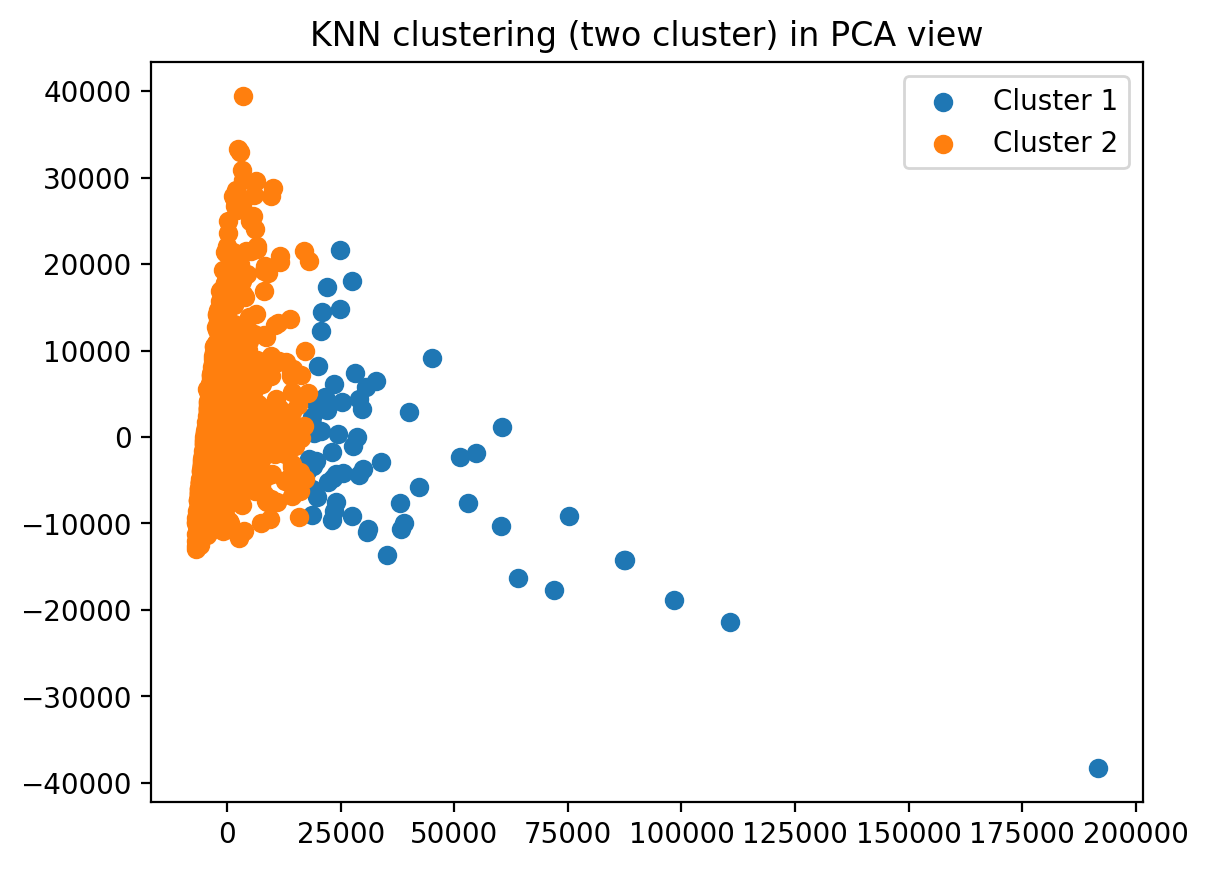

In [29]:
#Clustering --- PCA
PCA_transformer = PCA(2)
PCA_data = PCA_transformer.fit_transform(RFM_data)

# For two clusters.
n_clusters = 2
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(RFM_data)

# Plot!
for i in range(n_clusters):
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.legend()
plt.title("KNN clustering (two cluster) in PCA view")


# Save the plot
#plt.savefig("../image/clusters_plot_1.png", dpi=300,bbox_inches='tight')

# Display the plot 
plt.show()

Text(0, 0.5, 'possibility voting for republican')

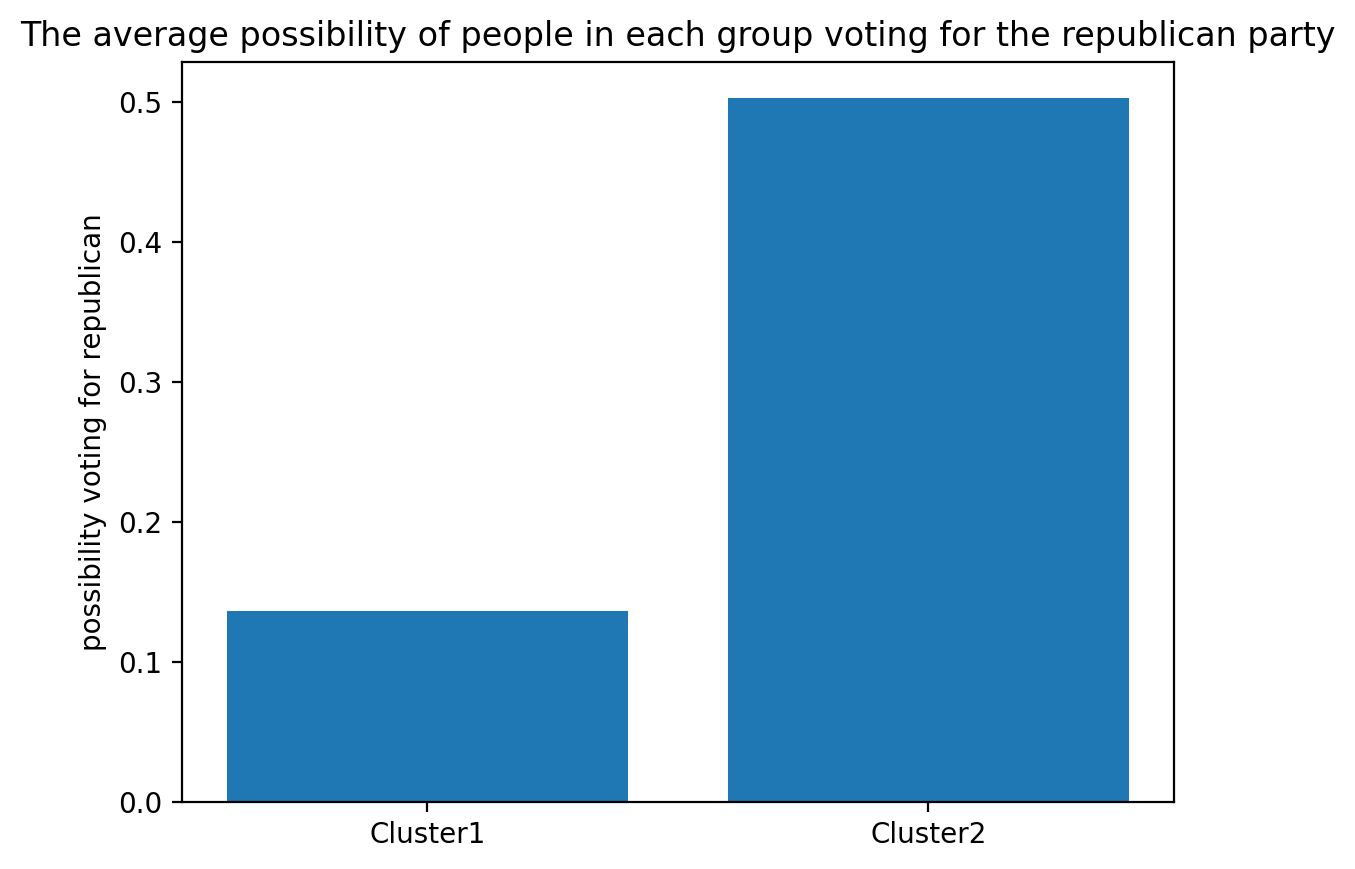

In [30]:
# plot the cluster frequency result
## Since 0 for democrat, and 1 for republican
## so when the mean value is close to 1, than it will show higher possibility of voting for republican, and vice versa

list1=[]
for i in range(n_clusters):
  list1.append(df2[cluster_labels==i][0].mean()) 

clusters=["Cluster1","Cluster2"]


plt.bar(clusters,list1)
plt.title("The average possibility of people in each group voting for the republican party")
plt.ylabel("possibility voting for republican") 
#plt.savefig("../image/comaprsion.png", dpi=300,bbox_inches='tight')

### Set up other types of models as supplement to compare with Random Forest, Logistic Regression

In [31]:
#Lasso AIC
model_bic = Pipeline([('features',PolynomialFeatures(degree=2)),('GLM',LassoLarsIC(criterion="bic", normalize=False))]) 
model_bic.fit(x_train, y_train)

#Lasso BIC
model_aic = Pipeline([('features',PolynomialFeatures(degree=2)),('GLM',LassoLarsIC(criterion="aic", normalize=False))]) 
model_aic.fit(x_train, y_train)

#SVM
model_svm = Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))])
model_svm.fit(x_train.astype(int), y_train.astype(int))

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])

In [32]:
#Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)


GradientBoostingClassifier()

In [34]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.4 MB/s eta 0:00:00a 0:00:01


In [35]:
#XGBoost method 
from xgboost import XGBClassifier

# create an instance of the XGBClassifier
xgb = XGBClassifier()

# fit the XGBClassifier to the training data
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

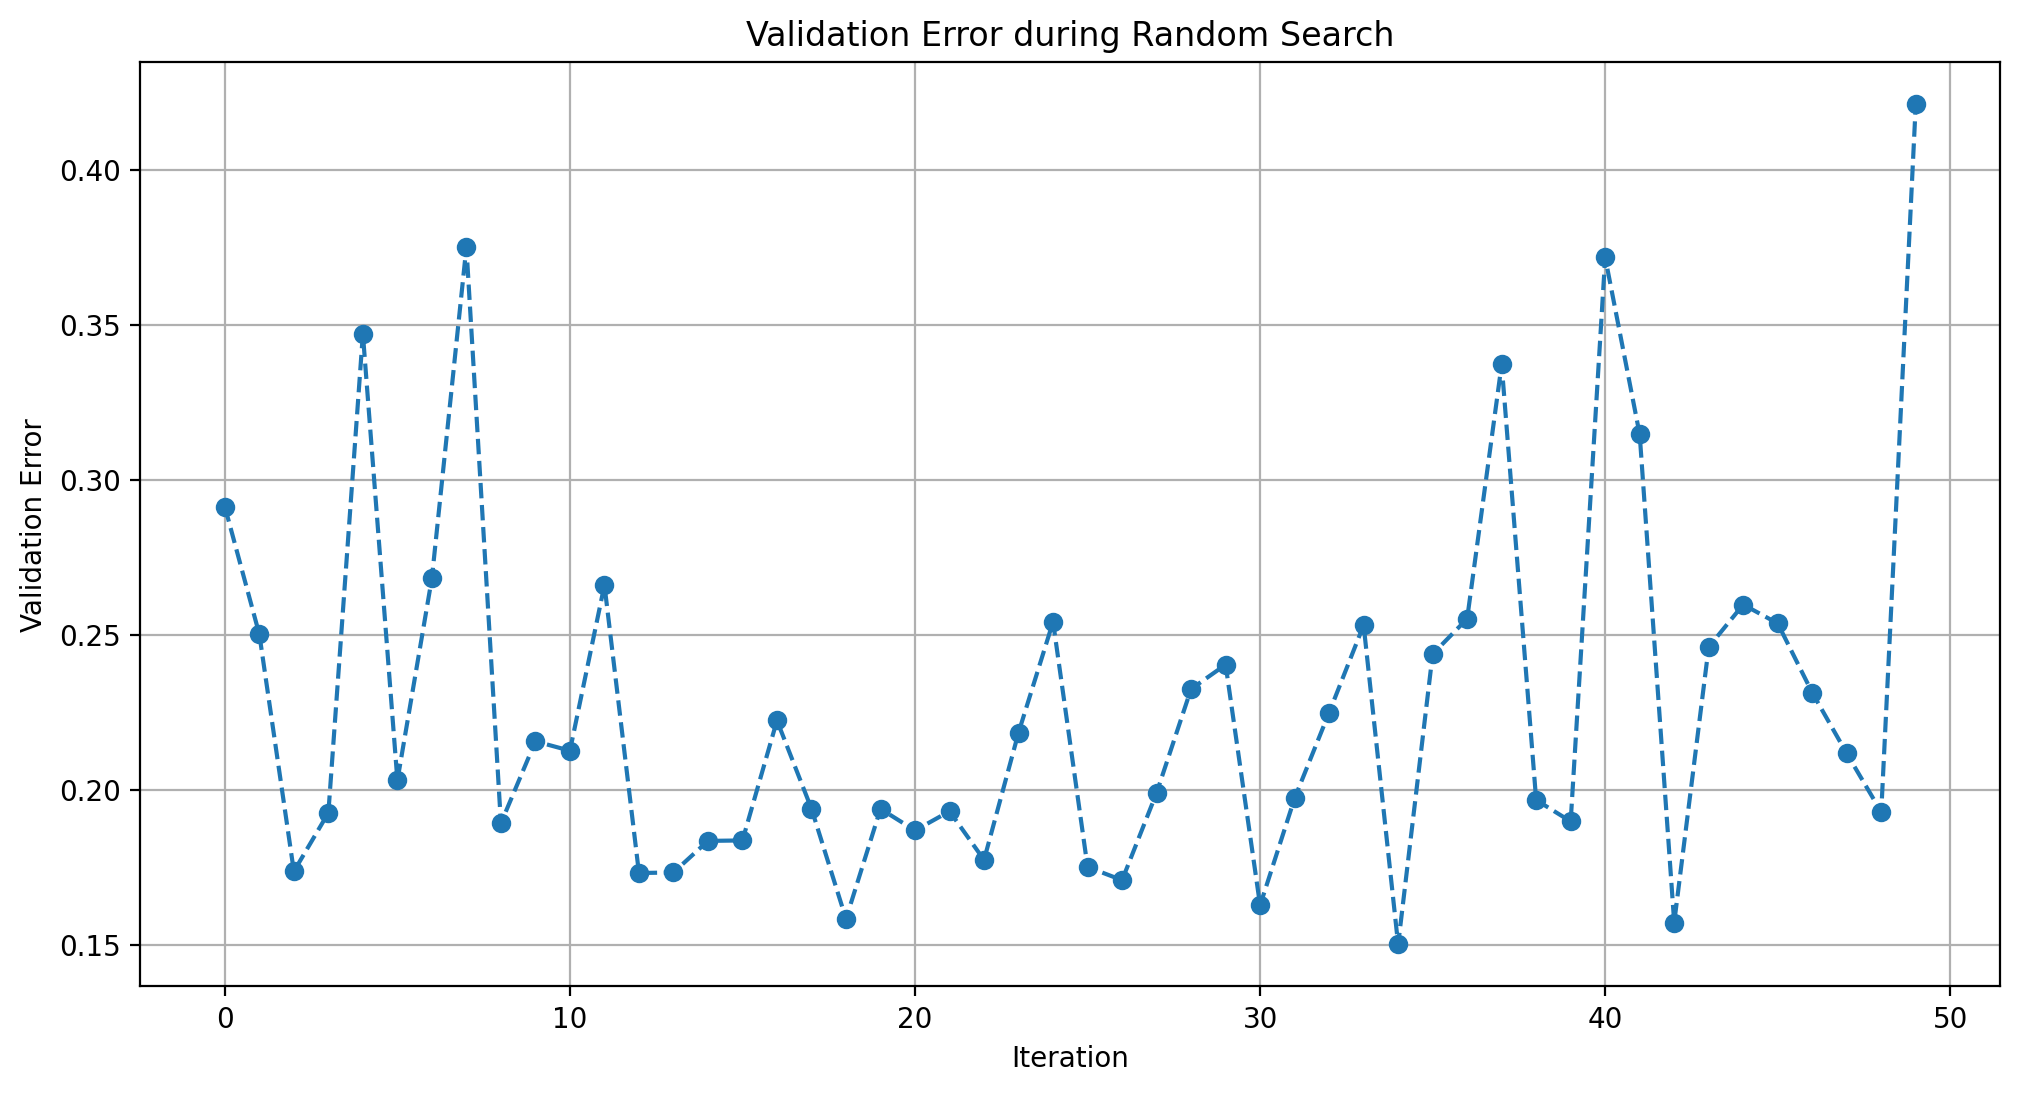

Optimal parameters: {'alpha': 0.03049702468618995, 'activation': 'relu', 'hidden_layer_sizes': (68,), 'learning_rate_init': 0.0035424250990933326}
Training error: 0.12489307100085545
Test error: 0.15568862275449102


In [36]:
## Neural Networks
### Here we set up the random serach to hyper parameter tuning 
from sklearn.neural_network import MLPClassifier
import random
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


n_iterations = 50


#set the maximum steps sizes for each random changes
step_sizes = {
    'alpha': 0.01,
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': 50,
    'learning_rate_init': 0.01
}

# Initial guess
current_params = {
    'alpha': 0.01,
    'activation': 'relu',
    'hidden_layer_sizes': (100,),
    'learning_rate_init': 0.001
}

best_params = current_params.copy()
best_val_error = float('inf')
progress = []

for i in range(n_iterations):
    # Randomly perturb the hyperparameters
    # I also set some lower limit for the parameters
    test_params = current_params.copy()
    test_params['alpha'] = max(
        0, test_params['alpha'] + random.uniform(-step_sizes['alpha'], step_sizes['alpha']))
    test_params['activation'] = random.choice(step_sizes['activation'])
    test_params['hidden_layer_sizes'] = (max(1, current_params['hidden_layer_sizes'][0] +
                                         random.randint(-step_sizes['hidden_layer_sizes'], step_sizes['hidden_layer_sizes'])),)
    test_params['learning_rate_init'] = max(0.0001, test_params['learning_rate_init'] +
                                            random.uniform(-step_sizes['learning_rate_init'], step_sizes['learning_rate_init']))

    # Train the model with the test parameters and perform cross-validation
    mlp = MLPClassifier(
        alpha=test_params['alpha'],
        activation=test_params['activation'],
        hidden_layer_sizes=test_params['hidden_layer_sizes'],
        learning_rate_init=test_params['learning_rate_init'],
        early_stopping=True,
        random_state=42,
        max_iter=5000
    )

    # fit the model
    mlp.fit(X_train_scaled, y_train)

    # Use interal method of MLP to get the cross validation scores and errors
    val_score = np.mean(mlp.validation_scores_)
    val_error = 1 - val_score

    # Update the best parameters if the validation error is lower
    if val_error < best_val_error:
        best_val_error = val_error
        best_params = test_params.copy()
        current_params = test_params.copy()
    else:
        current_params = best_params.copy()

    # Record the progression
    progress.append((i, test_params, val_error))


# Record the progression of the search in a DataFrame
progress_df = pd.DataFrame(
    progress, columns=['iteration', 'parameters', 'validation_error'])

# Visualize the validation error results
plt.figure(figsize=(12, 6),dpi=200)

plt.plot(progress_df['iteration'],
         progress_df['validation_error'], marker='o', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Validation Error')
plt.title('Validation Error during Random Search')
plt.grid()
plt.show()


# Train the model with the optimal parameters
optimal_mlp = MLPClassifier(
    alpha=best_params['alpha'],
    activation=best_params['activation'],
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    learning_rate_init=best_params['learning_rate_init'],
    early_stopping=True,
    random_state=42,
    max_iter=5000
)
optimal_mlp.fit(X_train_scaled, y_train)

# predict the model
y_pred_train = optimal_mlp.predict(X_train_scaled)
y_pred_test = optimal_mlp.predict(X_test_scaled)

# Calculate the training and test accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the training, test, and validation errors
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy


print("Optimal parameters:", best_params)
print("Training error:", train_error)
print("Test error:", test_error)



### Get model predition for each model

In [37]:
#### Built up the Table to compare train and test auc score to check if overfitting

#Get the train auc score
def compute_auc_scores(y_train, y_train_pred, y_test, y_test_pred):
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    return auc_train, auc_test

# train
gbm_train_preds = gbm.predict_proba(x_train)[:, 1]
nn_train_preds = optimal_mlp.predict_proba(X_train_scaled)[:, 1]
xgb_train_preds = xgb.predict_proba(x_train)[:, 1]
logreg_train_pred = model.predict_proba(x_train)[:, 1]
lasso_bic_train_pred = model_bic.predict(x_train)
lasso_aic_train_pred = model_aic.predict(x_train)
svm_train_pred = model_svm.predict_proba(x_train)[:, 1]
rf_train_pred = clf.predict_proba(x_train)[:, 1]

# test
gbm_preds = gbm.predict_proba(x_test)[:, 1]
nn_preds = optimal_mlp.predict_proba(X_test_scaled)[:, 1]
xgb_preds = xgb.predict_proba(x_test)[:, 1]
logreg_pred = model.predict_proba(x_test)[:, 1]
lasso_bic_pred = model_bic.predict(x_test)
lasso_aic_pred = model_aic.predict(x_test)
svm_pred = model_svm.predict_proba(x_test)[:, 1]
rf_pred = clf.predict_proba(x_test)[:, 1]


auc_logreg_train, auc_logreg_test = compute_auc_scores(y_train, logreg_train_pred, y_test, logreg_pred)
auc_lasso_bic_train, auc_lasso_bic_test = compute_auc_scores(y_train, lasso_bic_train_pred, y_test, lasso_bic_pred)
auc_lasso_aic_train, auc_lasso_aic_test = compute_auc_scores(y_train, lasso_aic_train_pred, y_test, lasso_aic_pred)
auc_svm_train, auc_svm_test = compute_auc_scores(y_train, svm_train_pred, y_test, svm_pred)
auc_rf_train, auc_rf_test = compute_auc_scores(y_train, rf_train_pred, y_test, rf_pred)
auc_gbm_train, auc_gbm_test = compute_auc_scores(y_train, gbm_train_preds, y_test, gbm_preds)
auc_nn_train, auc_nn_test = compute_auc_scores(y_train, nn_train_preds, y_test, nn_preds)
auc_xgb_train, auc_xgb_test = compute_auc_scores(y_train, xgb_train_preds, y_test, xgb_preds)


In [38]:
## Set up the table
data = {
    'Model': ['GBM', 'Neural Network', 'XGBoost', 'Logistic Regression', 'Lasso BIC', 'Lasso AIC', 'SVM', 'Random Forest'],
    'AUC Train': [round(auc_gbm_train, 4), round(auc_nn_train, 4), round(auc_xgb_train, 4), round(auc_logreg_train, 4), round(auc_lasso_bic_train, 4), round(auc_lasso_aic_train, 4), round(auc_svm_train, 4), round(auc_rf_train, 4)],
    'AUC Test': [round(auc_gbm_test, 4),  round(auc_nn_test, 4), round(auc_xgb_test, 4), round(auc_logreg_test, 4), round(auc_lasso_bic_test, 4), round(auc_lasso_aic_test, 4), round(auc_svm_test, 4), round(auc_rf_test, 4)]
}

auc_scores_df = pd.DataFrame(data)


In [39]:
print(auc_scores_df)

                 Model  AUC Train  AUC Test
0                  GBM     0.9883    0.9279
1       Neural Network     0.9557    0.9294
2              XGBoost     1.0000    0.9268
3  Logistic Regression     0.9878    0.8989
4            Lasso BIC     0.8812    0.8873
5            Lasso AIC     0.9243    0.8980
6                  SVM     0.9341    0.9249
7        Random Forest     1.0000    0.9324


##### Basically, we don't see obvious overfitting issue for the train and test comparison

In [40]:
# export the table to png
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
    return ax


In [42]:
# save to png files
sorted_auc_scores_df = auc_scores_df.sort_values(by='AUC Test', ascending=False)
ax = render_mpl_table(sorted_auc_scores_df, header_columns=0, col_width=4.0)
#plt.savefig("../image/auc_scores_table.png", dpi=300, bbox_inches='tight')
plt.close()


## Plot the Test AUC plot for all models

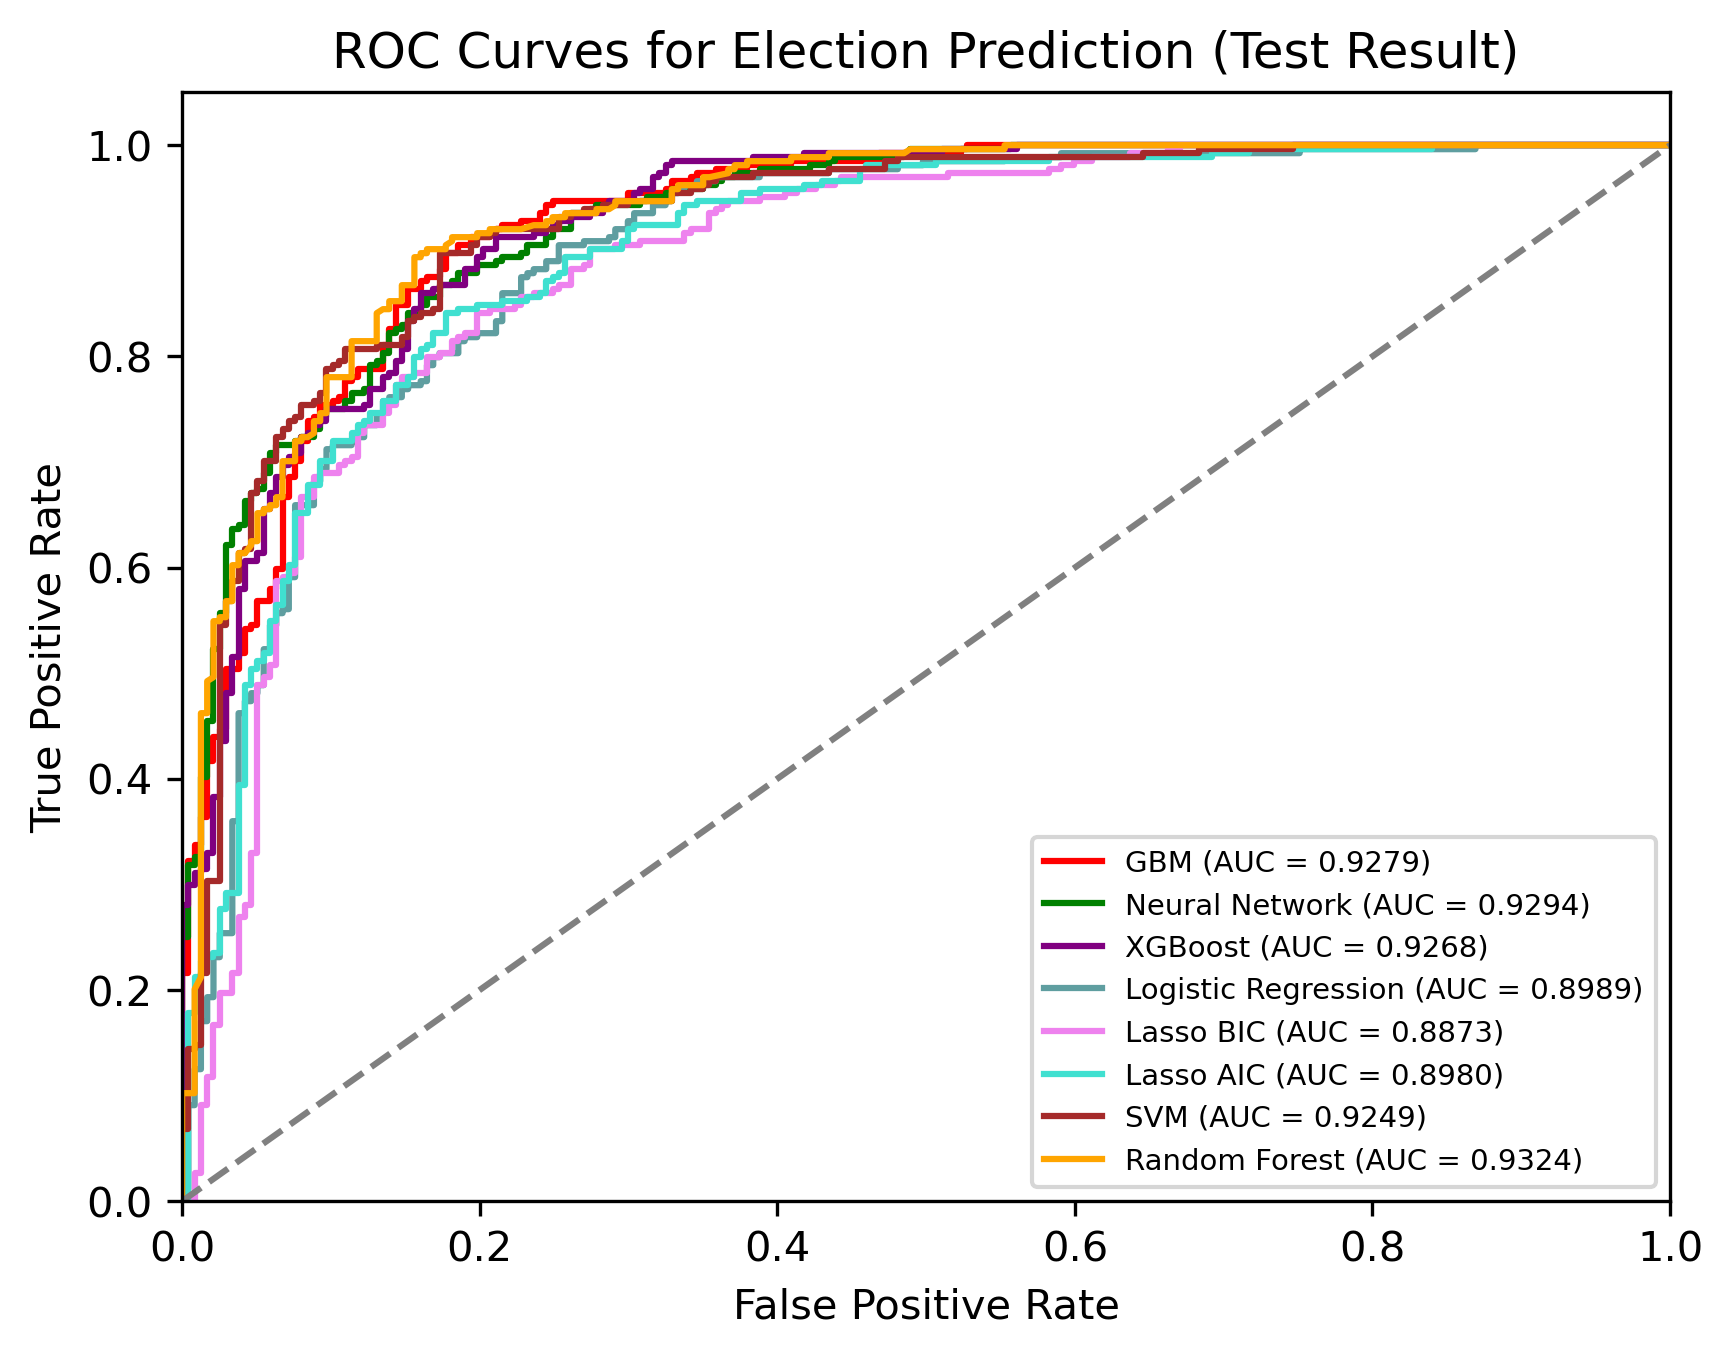

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each method
def plot_roc_curve(y_true, y_pred, label, color):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.4f})')




plt.figure(dpi=300)

plot_roc_curve(y_test, gbm_preds, 'GBM', 'red')
plot_roc_curve(y_test, nn_preds, 'Neural Network', 'green')
plot_roc_curve(y_test, xgb_preds, 'XGBoost', 'purple')
plot_roc_curve(y_test, logreg_pred, 'Logistic Regression', 'cadetblue')
plot_roc_curve(y_test, lasso_bic_pred, 'Lasso BIC', 'violet')
plot_roc_curve(y_test, lasso_aic_pred, 'Lasso AIC', 'turquoise')
plot_roc_curve(y_test, svm_pred, 'SVM', 'brown')
plot_roc_curve(y_test, rf_pred, 'Random Forest', 'orange')



plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Election Prediction (Test Result)')
plt.legend(loc="lower right",fontsize=7)

#save the plot
#plt.savefig("../image/ROC_curve.png", dpi=300,bbox_inches='tight')

plt.show()


Seems like the Random Forest has the best AUC. Overall the Random Forest is relatively better based on its AUC test score and relatively lower computional cost.

* Note that the result will be slightly different each time since I use random serach for several models.